<a href="https://colab.research.google.com/github/sowrabh-adiga/time-series-supervised-ml-project/blob/main/time_series_supervised_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🐂🚜 Predicting the Sale of Bull-dozer using ML (Kaggle Competition)


## 1. Problem Defination
>Predict the auction sale price for a piece of heavy equipment with ML to create a "blue book" for bulldozers.

## 2.  Data
Kaggle Bluebook for bull dozers competition :
>https://www.kaggle.com/c/bluebook-for-bulldozers

The data for this competition is split into three parts:

* Train.csv is the training set, which contains data through the end of 2011.

* Valid.csv is the validation set, which contains data from January 1, 2012 - April 30, 2012 You make predictions on this set throughout the majority of the competition. Your score on this set is used to create the public leaderboard.

* Test.csv is the test set, which won't be released until the last week of the competition. It contains data from May 1, 2012 - November 2012. Your score on the test set determines your final rank for the competition.


## 3. Evaluation 
>The evaluation metric for this competition is the RMSLE (root mean squared log error) between the actual and predicted auction prices.

For more info : https://www.kaggle.com/c/bluebook-for-bulldozers/overview/evaluation



---


**Note**: The goal of any regession evalution metric is to reduce the error. Here the chosen metric is RMSLE.

## 4. Features

Kaggle has provided with data dictionary of all features in dataset.

> https://github.com/sowrabh-adiga/time-series-supervised-ml-project/blob/main/Data%20Dictionary.xlsx

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [2]:
# For kaggle imports

# 1)
! pip install -q kaggle
# 2)
! mkdir ~/.kaggle


mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [3]:
# 3) upload kaggle.jason API key file
! cp kaggle.json ~/.kaggle/
# 4)
! chmod 600 ~/.kaggle/kaggle.json

In [4]:
# 5)
! kaggle datasets list

ref                                                           title                                              size  lastUpdated          downloadCount  
------------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
gpreda/reddit-vaccine-myths                                   Reddit Vaccine Myths                              229KB  2021-06-19 20:05:51           7991  
crowww/a-large-scale-fish-dataset                             A Large Scale Fish Dataset                          3GB  2021-04-28 17:03:01           4871  
imsparsh/musicnet-dataset                                     MusicNet Dataset                                   22GB  2021-02-18 14:12:19           1650  
dhruvildave/wikibooks-dataset                                 Wikibooks Dataset                                   1GB  2021-06-21 13:35:12           2269  
mathurinache/twitter-edge-nodes                               Tw

In [5]:
# 6) get dataset
# ! kaggle competitions download -c 'name-of-competition'
# Found in competition pages
! kaggle competitions download -c bluebook-for-bulldozers

 52% 5.00M/9.59M [00:00<00:00, 20.7MB/s]
100% 9.59M/9.59M [00:00<00:00, 32.1MB/s]
100% 5.00M/5.01M [00:00<00:00, 7.12MB/s]
100% 5.01M/5.01M [00:00<00:00, 6.87MB/s]
  0% 0.00/291k [00:00<?, ?B/s]
100% 291k/291k [00:00<00:00, 95.6MB/s]
  0% 0.00/192k [00:00<?, ?B/s]
100% 192k/192k [00:00<00:00, 83.2MB/s]
  0% 0.00/10.8k [00:00<?, ?B/s]
100% 10.8k/10.8k [00:00<00:00, 11.4MB/s]
 71% 5.00M/7.06M [00:00<00:00, 26.1MB/s]
100% 7.06M/7.06M [00:00<00:00, 34.2MB/s]
  0% 0.00/207k [00:00<?, ?B/s]
100% 207k/207k [00:00<00:00, 164MB/s]
  0% 0.00/338k [00:00<?, ?B/s]
100% 338k/338k [00:00<00:00, 110MB/s]
 96% 9.00M/9.38M [00:00<00:00, 20.5MB/s]
100% 9.38M/9.38M [00:00<00:00, 21.2MB/s]
  0% 0.00/209k [00:00<?, ?B/s]
100% 209k/209k [00:00<00:00, 62.5MB/s]
 54% 5.00M/9.28M [00:00<00:00, 19.8MB/s]
100% 9.28M/9.28M [00:00<00:00, 30.9MB/s]
  0% 0.00/297k [00:00<?, ?B/s]
100% 297k/297k [00:00<00:00, 94.7MB/s]
 73% 5.00M/6.85M [00:00<00:00, 7.43MB/s]
100% 6.85M/6.85M [00:00<00:00, 10.0MB/s]
  0% 0.00/316k [0

In [6]:
# Unzip the data
! unzip TrainAndValid.zip

Archive:  TrainAndValid.zip
  inflating: TrainAndValid.csv       


In [7]:
#import data

df = pd.read_csv('TrainAndValid.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (13,39,40,41) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [8]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,11/16/2006 0:00,521D,521,D,NaN,NaN,NaN,Wheel Loader - 110.0 to 120.0 Horsepower,Alabama,WL,Wheel Loader,NaN,EROPS w AC,None or Unspecified,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,3/26/2004 0:00,950FII,950,F,II,NaN,Medium,Wheel Loader - 150.0 to 175.0 Horsepower,North Carolina,WL,Wheel Loader,NaN,EROPS w AC,None or Unspecified,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,23.5,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2/26/2004 0:00,226,226,NaN,NaN,NaN,NaN,Skid Steer Loader - 1351.0 to 1601.0 Lb Operat...,New York,SSL,Skid Steer Loaders,NaN,OROPS,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Auxiliary,NaN,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,None or Unspecified,Standard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,5/19/2011 0:00,PC120-6E,PC120,NaN,-6E,NaN,Small,"Hydraulic Excavator, Track - 12.0 to 14.0 Metr...",Texas,TEX,Track Excavators,NaN,EROPS w AC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,7/23/2009 0:00,S175,S175,NaN,NaN,NaN,NaN,Skid Steer Loader - 1601.0 to 1751.0 Lb Operat...,New York,SSL,Skid Steer Loaders,NaN,EROPS,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Auxiliary,NaN,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,None or Unspecified,Standard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [10]:
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

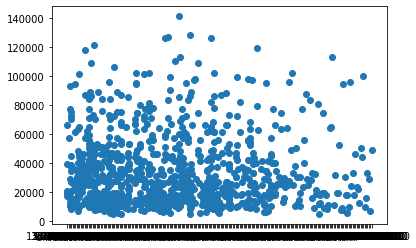

In [11]:
fig, ax = plt.subplots()
ax.scatter(df['saledate'][:1000],df['SalePrice'][:1000])

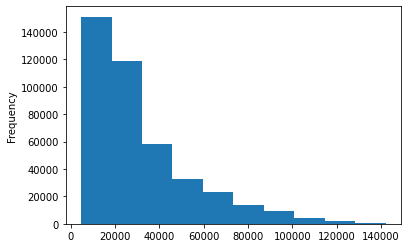

In [12]:
df['SalePrice'].plot.hist();

# Parsing dates

## Intime series data, we need to encode time & date component 

## Pandas takes care of it if we pass it as `parse date` parameter (Coverts to datetime object) 

In [13]:
# Import data with parse data

df = pd.read_csv('TrainAndValid.csv',
                 parse_dates=['saledate'])

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (13,39,40,41) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [14]:
df.saledate.dtype

dtype('<M8[ns]')

In [15]:
df.saledate

0        2006-11-16
1        2004-03-26
2        2004-02-26
3        2011-05-19
4        2009-07-23
            ...    
412693   2012-03-07
412694   2012-01-28
412695   2012-01-28
412696   2012-03-07
412697   2012-01-28
Name: saledate, Length: 412698, dtype: datetime64[ns]

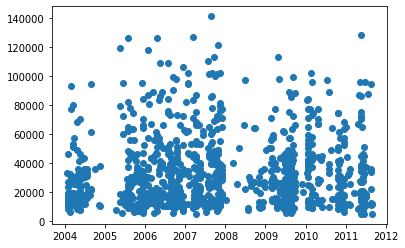

In [16]:
fig, ax = plt.subplots()
ax.scatter(df['saledate'][:1000],df['SalePrice'][:1000])

In [17]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,521D,521,D,NaN,NaN,NaN,Wheel Loader - 110.0 to 120.0 Horsepower,Alabama,WL,Wheel Loader,NaN,EROPS w AC,None or Unspecified,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,950FII,950,F,II,NaN,Medium,Wheel Loader - 150.0 to 175.0 Horsepower,North Carolina,WL,Wheel Loader,NaN,EROPS w AC,None or Unspecified,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,23.5,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,226,226,NaN,NaN,NaN,NaN,Skid Steer Loader - 1351.0 to 1601.0 Lb Operat...,New York,SSL,Skid Steer Loaders,NaN,OROPS,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Auxiliary,NaN,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,None or Unspecified,Standard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,PC120-6E,PC120,NaN,-6E,NaN,Small,"Hydraulic Excavator, Track - 12.0 to 14.0 Metr...",Texas,TEX,Track Excavators,NaN,EROPS w AC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,S175,S175,NaN,NaN,NaN,NaN,Skid Steer Loader - 1601.0 to 1751.0 Lb Operat...,New York,SSL,Skid Steer Loaders,NaN,EROPS,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Auxiliary,NaN,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,None or Unspecified,Standard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
# or
df.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000,57000,10000,38500,11000
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3,3,3,3,3
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68,4640,2838,3486,722
UsageBand,Low,Low,High,High,Medium
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00


# Sort Dataframe by sale date

## It is good to work with time series data when it is sorted by date

In [19]:
# Sorting DataFrame in date order
df.sort_values(by=['saledate'],inplace=True,ascending=True)

In [20]:
df.saledate.head(25)

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
54653    1989-01-31
81383    1989-01-31
204924   1989-01-31
135376   1989-01-31
113390   1989-01-31
113394   1989-01-31
116419   1989-01-31
32138    1989-01-31
127610   1989-01-31
76171    1989-01-31
127000   1989-01-31
128130   1989-01-31
127626   1989-01-31
55455    1989-01-31
55454    1989-01-31
144032   1989-01-31
54438    1989-01-31
144952   1989-01-31
205752   1989-01-31
28927    1989-01-31
Name: saledate, dtype: datetime64[ns]

In [21]:
### It's better to have a original copy
df_temp = df.copy()

In [22]:
df_temp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500,14000,50000,16000,22000
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18,99,99,99,99
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,1989-01-17 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00


### Add datetime parameters for `saledate` column

---



---



In [23]:
df_temp[:1].saledate.dt.year

205615    1989
Name: saledate, dtype: int64

In [24]:
df_temp[:1].saledate.dt.day

205615    17
Name: saledate, dtype: int64

In [25]:
df_temp[:1].saledate

205615   1989-01-17
Name: saledate, dtype: datetime64[ns]

In [26]:
df_temp['saleYear'] = df_temp.saledate.dt.year
df_temp['saleMonth'] = df_temp.saledate.dt.month
df_temp['saleDay'] = df_temp.saledate.dt.day
df_temp['saleDayofWeek'] = df_temp.saledate.dt.dayofweek
df_temp['saleDayofYear'] = df_temp.saledate.dt.dayofyear

In [27]:
df_temp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500,14000,50000,16000,22000
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18,99,99,99,99
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,1989-01-17 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00


In [28]:
# The data is enriched, So drop sale date column
df_temp.drop('saledate',axis=1,inplace=True)

In [29]:
df_temp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500,14000,50000,16000,22000
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18,99,99,99,99
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
fiModelDesc,TD20,A66,D7G,A62,D3B


In [30]:
df_temp.state.value_counts()

Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Iowa               1336
Montana            1336
Oklahoma           1326
Nebraska            866
West Virginia   

## Modelling

 EDA is good but model based EDA is priority now

In [31]:
# from sklearn.ensemble import RandomForestRegressor

# model = RandomForestRegressor(n_jobs=-1,
#                               random_state=42)
# model.fit(df_temp.drop('SalePrice',axis=1),df_temp['SalePrice'])

###  Not all data is numerical so we get above error

### String to categories
Several datatype to be used with pandas: https://pandas.pydata.org/pandas-docs/stable/reference/general_utility_functions.html#data-types-related-functionality


In [32]:
pd.api.types.is_string_dtype(df_temp['UsageBand'])

True

In [33]:
#find column with string data
string_item_count = 0
for labels,content in df_temp.items():
  if pd.api.types.is_string_dtype(content):
    print(labels)
    string_item_count +=1
print(f'Number of columns which is string data : {string_item_count}')

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls
Number of columns which is string data : 44


In [34]:
#String to categorical value
for label,content in df_temp.items():
  if pd.api.types.is_string_dtype(content):
    df_temp[label] = content.astype('category').cat.as_ordered()

In [35]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor       

In [36]:
df_temp.state.cat.categories



Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'Washington DC', 'West Virginia', 'Wisconsin',
       'Wyoming'],
      dtype='object')

In [37]:
set(df.state)
# pd.api.types.is_string_dtype(df['state'])

{'Alabama',
 'Alaska',
 'Arizona',
 'Arkansas',
 'California',
 'Colorado',
 'Connecticut',
 'Delaware',
 'Florida',
 'Georgia',
 'Hawaii',
 'Idaho',
 'Illinois',
 'Indiana',
 'Iowa',
 'Kansas',
 'Kentucky',
 'Louisiana',
 'Maine',
 'Maryland',
 'Massachusetts',
 'Michigan',
 'Minnesota',
 'Mississippi',
 'Missouri',
 'Montana',
 'Nebraska',
 'Nevada',
 'New Hampshire',
 'New Jersey',
 'New Mexico',
 'New York',
 'North Carolina',
 'North Dakota',
 'Ohio',
 'Oklahoma',
 'Oregon',
 'Pennsylvania',
 'Puerto Rico',
 'Rhode Island',
 'South Carolina',
 'South Dakota',
 'Tennessee',
 'Texas',
 'Unspecified',
 'Utah',
 'Vermont',
 'Virginia',
 'Washington',
 'Washington DC',
 'West Virginia',
 'Wisconsin',
 'Wyoming'}

`Under-the-hood` the `pandas` is `treating` these categories as `numerical data`, although it looks like a string.

In [38]:
df_temp.state.cat.codes

205615    43
274835     8
141296     8
212552     8
62755      8
          ..
410879     4
412476     4
411927     4
407124     4
409203     4
Length: 412698, dtype: int8

In [39]:
df_temp.state

205615         Texas
274835       Florida
141296       Florida
212552       Florida
62755        Florida
             ...    
410879    California
412476    California
411927    California
407124    California
409203    California
Name: state, Length: 412698, dtype: category
Categories (53, object): ['Alabama' < 'Alaska' < 'Arizona' < 'Arkansas' ... 'Washington DC' <
                          'West Virginia' < 'Wisconsin' < 'Wyoming']

In [40]:
df_temp.isnull().sum()/len(df_temp)

SalesID                     0.000000
SalePrice                   0.000000
MachineID                   0.000000
ModelID                     0.000000
datasource                  0.000000
auctioneerID                0.048791
YearMade                    0.000000
MachineHoursCurrentMeter    0.642586
UsageBand                   0.821492
fiModelDesc                 0.000000
fiBaseModel                 0.000000
fiSecondaryDesc             0.340993
fiModelSeries               0.857845
fiModelDescriptor           0.818715
ProductSize                 0.524851
fiProductClassDesc          0.000000
state                       0.000000
ProductGroup                0.000000
ProductGroupDesc            0.000000
Drive_System                0.740520
Enclosure                   0.000809
Forks                       0.520921
Pad_Type                    0.803498
Ride_Control                0.629928
Stick                       0.803498
Transmission                0.544444
Turbocharged                0.803498
B



---



---



---
Under standing Categorical data-type


In [41]:
#Save preprocessed data
df_temp.to_csv('train_tmp.csv',index=False)

In [42]:
f = pd.DataFrame({'vertebrates': ['Bird', 'Bird', 'Mammal', 'Fish', 'Amphibian', 'Reptile', 'Mammal']})
f

,vertebrates
0,Bird
1,Bird
2,Mammal
3,Fish
4,Amphibian
5,Reptile
6,Mammal


In [43]:
f.vertebrates.astype("category").cat.codes

0    1
1    1
2    3
3    2
4    0
5    4
6    3
dtype: int8

In [44]:
f

,vertebrates
0,Bird
1,Bird
2,Mammal
3,Fish
4,Amphibian
5,Reptile
6,Mammal




---



---



---



#Filling numerical missing value

In [45]:
for label,content in df_temp.items():
  if pd.api.types.is_numeric_dtype(content):
    print(label)

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
saleYear
saleMonth
saleDay
saleDayofWeek
saleDayofYear


In [46]:
# Check which numeric data column have missing value
for label,content in df_temp.items():
  if pd.api.types.is_numeric_dtype(content):
    if pd.isnull(content).sum():
      print(label)

auctioneerID
MachineHoursCurrentMeter


In [47]:
# Check which numeric data column have missing value (2nd way)
for label,content in df_temp.items():
  if pd.api.types.is_numeric_dtype(content) and pd.isnull(content).sum():
    print(label)

auctioneerID
MachineHoursCurrentMeter


In [48]:
for label,content in df_temp.items():
  if pd.api.types.is_numeric_dtype(content) and pd.isnull(content).sum():
    # add a binary column which tells us if data was missing
    df_temp[label+'_is_missing'] = pd.isnull(content)
    # Fill missing numeric values with median
    df_temp[label] = content.fillna(content.median())
    

    

### `Mean` is more `sensitive` for `outliers` when there is a lot of data
### so `Median` is `preferred` instead of Mean


In [49]:
# Check which numeric data column have missing value
for label,content in df_temp.items():
  if pd.api.types.is_numeric_dtype(content):
    if pd.isnull(content).sum():
      print(label)

In [50]:
df_temp.auctioneerID_is_missing.head(20)

205615    False
274835    False
141296    False
212552    False
62755     False
54653     False
81383     False
204924    False
135376    False
113390    False
113394    False
116419    False
32138     False
127610    False
76171     False
127000    False
128130    False
127626    False
55455     False
55454     False
Name: auctioneerID_is_missing, dtype: bool

In [51]:
df_temp.auctioneerID_is_missing.value_counts()

False    392562
True      20136
Name: auctioneerID_is_missing, dtype: int64

In [52]:
df_temp.isna().sum()

SalesID                                     0
SalePrice                                   0
MachineID                                   0
ModelID                                     0
datasource                                  0
auctioneerID                                0
YearMade                                    0
MachineHoursCurrentMeter                    0
UsageBand                              339028
fiModelDesc                                 0
fiBaseModel                                 0
fiSecondaryDesc                        140727
fiModelSeries                          354031
fiModelDescriptor                      337882
ProductSize                            216605
fiProductClassDesc                          0
state                                       0
ProductGroup                                0
ProductGroupDesc                            0
Drive_System                           305611
Enclosure                                 334
Forks                             

# Filling Non-numeric missing data

In [53]:
# Check for columns which are'nt numeric
for label,content in df_temp.items():
  if not pd.api.types.is_numeric_dtype(content):
    print(label)


UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [54]:
pd.Categorical(df_temp["state"]).codes


array([43,  8,  8, ...,  4,  4,  4], dtype=int8)

In [55]:
pd.Categorical(df_temp["UsageBand"]).codes+1

array([0, 0, 0, ..., 0, 0, 0], dtype=int8)

In [56]:
# Turn categorical data into numbers and fill missing
for label,content in df_temp.items():
  if not pd.api.types.is_numeric_dtype(content):
    # Add a binary colum to indicate whether sample had missing value
    df_temp[label+'_is_missing'] = pd.isnull(content)
    # Turn categories into numbers and add 1
    df_temp[label] = pd.Categorical(content).codes + 1

### After this missing categorical data is zero and other variables are filled by a number

In [57]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Columns: 103 entries, SalesID to Steering_Controls_is_missing
dtypes: bool(46), float64(3), int16(5), int64(10), int8(39)
memory usage: 81.5 MB


In [58]:
df_temp.head(10).T

,205615,274835,141296,212552,62755,54653,81383,204924,135376,113390
SalesID,1646770,1821514,1505138,1671174,1329056,1301884,1379228,1645390,1493279,1449549
SalePrice,9500,14000,50000,16000,22000,23500,31000,11750,63000,13000
MachineID,1126363,1194089,1473654,1327630,1336053,1182999,1082797,1527216,1363756,1289412
ModelID,8434,10150,4139,8591,4089,4123,7620,8202,2759,3356
datasource,132,132,132,132,132,132,132,132,132,132
...,...,...,...,...,...,...,...,...,...,...
Backhoe_Mounting_is_missing,False,True,False,True,False,False,True,True,False,True
Blade_Type_is_missing,False,True,False,True,False,False,True,True,False,True
Travel_Controls_is_missing,False,True,False,True,False,False,True,True,False,True
Differential_Type_is_missing,True,False,True,False,True,True,False,False,True,True


In [59]:
df_temp.isna().sum()

SalesID                         0
SalePrice                       0
MachineID                       0
ModelID                         0
datasource                      0
                               ..
Backhoe_Mounting_is_missing     0
Blade_Type_is_missing           0
Travel_Controls_is_missing      0
Differential_Type_is_missing    0
Steering_Controls_is_missing    0
Length: 103, dtype: int64

### Now all data is numeric and no missing values, So ML- model should work


In [60]:
df_temp.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,...,fiModelSeries_is_missing,fiModelDescriptor_is_missing,ProductSize_is_missing,fiProductClassDesc_is_missing,state_is_missing,ProductGroup_is_missing,ProductGroupDesc_is_missing,Drive_System_is_missing,Enclosure_is_missing,Forks_is_missing,Pad_Type_is_missing,Ride_Control_is_missing,Stick_is_missing,Transmission_is_missing,Turbocharged_is_missing,Blade_Extension_is_missing,Blade_Width_is_missing,Enclosure_Type_is_missing,Engine_Horsepower_is_missing,Hydraulics_is_missing,Pushblock_is_missing,Ripper_is_missing,Scarifier_is_missing,Tip_Control_is_missing,Tire_Size_is_missing,Coupler_is_missing,Coupler_System_is_missing,Grouser_Tracks_is_missing,Hydraulics_Flow_is_missing,Track_Type_is_missing,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
205615,1646770,9500.0,1126363,8434,132,18.0,1974,0.0,0,4593,1744,0,0,0,4,47,44,5,5,0,6,0,0,0,0,3,0,0,0,0,0,1,0,2,0,0,0,0,0,0,...,True,True,False,False,False,False,False,True,False,True,True,True,True,False,True,True,True,True,True,False,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,True,True
274835,1821514,14000.0,1194089,10150,132,99.0,1980,0.0,0,1820,559,0,0,0,0,60,9,6,6,0,6,1,0,2,0,0,0,0,0,0,0,1,0,0,0,0,17,3,0,0,...,True,True,True,False,False,False,False,True,False,False,True,False,True,True,True,True,True,True,True,False,True,True,True,True,False,False,True,True,True,True,True,True,True,True,True,True,True,True,False,False
141296,1505138,50000.0,1473654,4139,132,99.0,1978,0.0,0,2348,713,59,0,0,2,50,9,5,5,0,6,0,0,0,0,8,0,0,0,0,0,1,0,2,0,0,0,0,0,0,...,True,True,False,False,False,False,False,True,False,True,True,True,True,False,True,True,True,True,True,False,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,True,True
212552,1671174,16000.0,1327630,8591,132,99.0,1980,0.0,0,1819,558,0,0,0,0,74,9,6,6,0,1,1,0,2,0,0,0,0,0,0,0,1,0,0,0,0,17,3,0,0,...,True,True,True,False,False,False,False,True,False,False,True,False,True,True,True,True,True,True,True,False,True,True,True,True,False,False,True,True,True,True,True,True,True,True,True,True,True,True,False,False
62755,1329056,22000.0,1336053,4089,132,99.0,1984,0.0,0,2119,683,21,0,0,0,51,9,5,5,0,6,0,0,0,0,8,0,0,0,0,0,1,0,2,0,0,0,0,0,0,...,True,True,True,False,False,False,False,True,False,True,True,True,True,False,True,True,True,True,True,False,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,True,True


# <font color='red'> Model 1</font>

In [61]:
%%time
#calculate how much time takes to execute the cell
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_jobs=-1,
                              random_state=42)
model.fit(df_temp.drop('SalePrice',axis=1),df_temp['SalePrice'])

CPU times: user 18min 4s, sys: 3.53 s, total: 18min 8s
Wall time: 9min 15s


In [62]:
#scoring : This is a dummy way of seeing results, but not reliable
model.score(df_temp.drop('SalePrice',axis=1),df_temp['SalePrice'])

0.9875495040871494

`Training and validation set must be diffrent`

Create a validation set

In [63]:
df_temp.saleYear.value_counts()

2009    43849
2008    39767
2011    35197
2010    33390
2007    32208
2006    21685
2005    20463
2004    19879
2001    17594
2000    17415
2002    17246
2003    15254
1998    13046
1999    12793
2012    11573
1997     9785
1996     8829
1995     8530
1994     7929
1993     6303
1992     5519
1991     5109
1989     4806
1990     4529
Name: saleYear, dtype: int64

In [64]:
#Split data into training and validation set

df_val = df_temp[df_temp.saleYear == 2012]
df_train = df_temp[df_temp.saleYear != 2012]
len(df_val)/len(df_train)

0.028851355562480523

In [65]:
len(df_val),len(df_train)

(11573, 401125)

In [66]:
# split to x and y
x_train,y_train = df_train.drop('SalePrice',axis=1), df_train.SalePrice
x_val,y_val = df_val.drop('SalePrice',axis=1), df_val.SalePrice

In [67]:
x_train.shape, y_train.shape,x_val.shape, y_val.shape

((401125, 102), (401125,), (11573, 102), (11573,))

# Create an eval function 

In [68]:
# For RMSLE
from sklearn.metrics import mean_squared_log_error, mean_absolute_error,r2_score


def rmsle(y_test,y_preds):
  '''
  Calculate root mean squared log error between predictions and true labels
  '''
  return np.sqrt(mean_squared_log_error(y_test,y_preds))


# Create function to evaluate model on difrrent metrics
def show_scores(model):
  '''
  Calculate multiple metrics for a given regression model 
  '''
  train_preds = model.predict(x_train)
  val_preds = model.predict(x_val)
  scores ={'Training MAE': mean_absolute_error(y_train,train_preds),
           'Valid MAE': mean_absolute_error(y_val, val_preds),
           'Training RMSLE': rmsle(y_train,train_preds),
           'Valid RMSLE': rmsle(y_val,val_preds),
           'Training R^2': r2_score(y_train,train_preds),
           'Valid R^2': r2_score(y_val,val_preds)}
  return scores

# Testing our model on subset (to tune hyperparameters)



```
%time
model = RandomForestRegressor(n_jobs=-1,
                              random_state=42)


model.fit(x_train,y_train)
```
### This will take very long duration to execute
So change the number of samples on which the model will run

In [69]:
# Change max sample values
from sklearn.ensemble import RandomForestRegressor
model =  RandomForestRegressor(n_jobs=-1,
                               random_state=42,
                               max_samples=10000)

In [70]:
%%time
# training on max_sample number of data reduces the run time of code, For almost 4L samples if it is limited to 10k the speed boost is 40 times
# but what about performace?

model.fit(x_train,y_train)

CPU times: user 42.4 s, sys: 176 ms, total: 42.6 s
Wall time: 22.8 s


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=10000, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [71]:
show_scores(model)

{'Training MAE': 5561.396858734807,
 'Training RMSLE': 0.2577477569876176,
 'Training R^2': 0.8607116981822567,
 'Valid MAE': 7181.745755638123,
 'Valid RMSLE': 0.293595185306081,
 'Valid R^2': 0.8316902392066935}




### Hyperparameter tuning with RandomizedSearchCV 

In [72]:
%%time

from sklearn.model_selection import RandomizedSearchCV

# Diffrent RandomForestRegressor hyperparameters
rf_grid = {'n_estimators':np.arange(10,100,100),
           'max_depth':[None,3,5,10],
           'min_samples_split':np.arange(2,20,2),
           'min_samples_leaf':np.arange(1,20,2),
           'max_features':[0.5,1,'sqrt','auto'],
           'max_samples':[10000]}

# Instantiate model
rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,
                                                    random_state=42),
                              param_distributions=rf_grid,
                              n_iter = 20,
                              cv=5,
                              verbose=True)

CPU times: user 128 µs, sys: 0 ns, total: 128 µs
Wall time: 106 µs


In [73]:
%%time

# fit the model
rs_model.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  4.4min finished


CPU times: user 3min 24s, sys: 10.7 s, total: 3min 35s
Wall time: 4min 27s


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100, n_jobs=-1,
                   

In [74]:
#Find best hyperparameters for model
rs_model.best_params_

{'max_depth': 10,
 'max_features': 'auto',
 'max_samples': 10000,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 10}

In [75]:
show_scores(rs_model)

{'Training MAE': 6681.024739157095,
 'Training RMSLE': 0.2988992467185582,
 'Training R^2': 0.8069624657802424,
 'Valid MAE': 8111.525059816809,
 'Valid RMSLE': 0.3262160186721003,
 'Valid R^2': 0.7860004775624824}

# Train model with n_estimators=100 and best were found

In [76]:
%%time
from sklearn.ensemble import RandomForestRegressor
#most ideal parameters
ideal_model = RandomForestRegressor(n_estimators=40,
                                   min_samples_leaf=1,
                                   min_samples_split=14,
                                   max_features=0.5,
                                   n_jobs=-1,
                                   max_samples=None,
                                    random_state=42)



CPU times: user 42 µs, sys: 0 ns, total: 42 µs
Wall time: 46.3 µs


In [77]:
#Fit the model
ideal_model.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=0.5, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=14, min_weight_fraction_leaf=0.0,
                      n_estimators=40, n_jobs=-1, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [78]:
# scores for model trained with ideal parameters 
show_scores(ideal_model)

{'Training MAE': 2946.8483786146953,
 'Training RMSLE': 0.14446831828269255,
 'Training R^2': 0.9589267192100979,
 'Valid MAE': 5963.098428944584,
 'Valid RMSLE': 0.2455197857548867,
 'Valid R^2': 0.8816029704165416}

In [79]:
# scores for model trained with 10k samples with randomizedsearchcv function
show_scores(rs_model)

{'Training MAE': 6681.024739157095,
 'Training RMSLE': 0.2988992467185582,
 'Training R^2': 0.8069624657802424,
 'Valid MAE': 8111.525059816809,
 'Valid RMSLE': 0.3262160186721003,
 'Valid R^2': 0.7860004775624824}

# <font color='red'> Make predictions  on kaggle test set</font>

In [80]:
!unzip Test.csv.zip

Archive:  Test.csv.zip
  inflating: Test.csv                


In [81]:
# Import test data
df_test = pd.read_csv('Test.csv',
                      parse_dates=['saledate'])
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,580,G,NaN,NaN,NaN,Backhoe Loader - 14.0 to 15.0 Ft Standard Digg...,Wyoming,BL,Backhoe Loaders,Two Wheel Drive,OROPS,Yes,None or Unspecified,No,Standard,Standard,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,936,NaN,NaN,NaN,Medium,Wheel Loader - 135.0 to 150.0 Horsepower,Virginia,WL,Wheel Loader,NaN,EROPS,Yes,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,20.5,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,EC210,B,NaN,LC,Large / Medium,"Hydraulic Excavator, Track - 21.0 to 24.0 Metr...",New Jersey,TEX,Track Excavators,NaN,EROPS w AC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Auxiliary,NaN,NaN,NaN,NaN,NaN,None or Unspecified,NaN,NaN,NaN,Steel,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,330,C,NaN,L,Large / Medium,"Hydraulic Excavator, Track - 33.0 to 40.0 Metr...",New Jersey,TEX,Track Excavators,NaN,EROPS w AC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,NaN,NaN,NaN,NaN,NaN,None or Unspecified,NaN,NaN,NaN,Steel,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,650,K,NaN,NaN,NaN,"Track Type Tractor, Dozer - 20.0 to 75.0 Horse...",Florida,TTT,Track Type Tractors,NaN,OROPS,NaN,NaN,NaN,NaN,Hydrostatic,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


In [82]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12457 entries, 0 to 12456
Data columns (total 52 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   SalesID                   12457 non-null  int64         
 1   MachineID                 12457 non-null  int64         
 2   ModelID                   12457 non-null  int64         
 3   datasource                12457 non-null  int64         
 4   auctioneerID              12457 non-null  int64         
 5   YearMade                  12457 non-null  int64         
 6   MachineHoursCurrentMeter  2129 non-null   float64       
 7   UsageBand                 1834 non-null   object        
 8   saledate                  12457 non-null  datetime64[ns]
 9   fiModelDesc               12457 non-null  object        
 10  fiBaseModel               12457 non-null  object        
 11  fiSecondaryDesc           8482 non-null   object        
 12  fiModelSeries     

In [83]:
df_test.isna().sum()

SalesID                         0
MachineID                       0
ModelID                         0
datasource                      0
auctioneerID                    0
YearMade                        0
MachineHoursCurrentMeter    10328
UsageBand                   10623
saledate                        0
fiModelDesc                     0
fiBaseModel                     0
fiSecondaryDesc              3975
fiModelSeries               10451
fiModelDescriptor            9433
ProductSize                  6409
fiProductClassDesc              0
state                           0
ProductGroup                    0
ProductGroupDesc                0
Drive_System                 9698
Enclosure                       2
Forks                        6149
Pad_Type                    10349
Ride_Control                 8216
Stick                       10349
Transmission                 7639
Turbocharged                10349
Blade_Extension             11806
Blade_Width                 11806
Enclosure_Type

In [84]:
# Preprocessing data (matching data format on Test data set)

def preprocess_data(df):
  ''' 
  Perform the data preprocessing done on training set
  '''
  df['saleYear'] = df.saledate.dt.year
  df['saleMonth'] = df.saledate.dt.month
  df['saleDay'] = df.saledate.dt.day
  df['saleDayofWeek'] = df.saledate.dt.dayofweek
  df['saleDayofYear'] = df.saledate.dt.dayofyear
  df.drop('saledate',axis=1,inplace=True)

  # Fill numerical data with median
  for label,content in df.items():
    if pd.api.types.is_numeric_dtype(content) and pd.isnull(content).sum():
      # add a binary column which tells us if data was missing
      df[label+'_is_missing'] = pd.isnull(content)
      # Fill missing numeric values with median
      df[label] = content.fillna(content.median())

  # Fill non-numerical data
  for label,content in df.items():
    if not pd.api.types.is_numeric_dtype(content):
      # Add a binary colum to indicate whether sample had missing value
      df[label+'_is_missing'] = pd.isnull(content)
      # Turn categories into numbers and add 1
      df[label] = pd.Categorical(content).codes + 1
   
  return df

In [85]:
# process Test data
df_test = preprocess_data(df_test)
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12457 entries, 0 to 12456
Columns: 101 entries, SalesID to Steering_Controls_is_missing
dtypes: bool(45), float64(1), int16(2), int64(11), int8(42)
memory usage: 2.2 MB


In [86]:
df_test.shape

(12457, 101)

In [87]:
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,...,fiModelSeries_is_missing,fiModelDescriptor_is_missing,ProductSize_is_missing,fiProductClassDesc_is_missing,state_is_missing,ProductGroup_is_missing,ProductGroupDesc_is_missing,Drive_System_is_missing,Enclosure_is_missing,Forks_is_missing,Pad_Type_is_missing,Ride_Control_is_missing,Stick_is_missing,Transmission_is_missing,Turbocharged_is_missing,Blade_Extension_is_missing,Blade_Width_is_missing,Enclosure_Type_is_missing,Engine_Horsepower_is_missing,Hydraulics_is_missing,Pushblock_is_missing,Ripper_is_missing,Scarifier_is_missing,Tip_Control_is_missing,Tire_Size_is_missing,Coupler_is_missing,Coupler_System_is_missing,Grouser_Tracks_is_missing,Hydraulics_Flow_is_missing,Track_Type_is_missing,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,25,0,0,0,2,51,1,1,4,3,2,2,1,2,7,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,0,0,0,4,57,46,6,6,0,1,2,0,2,0,0,0,0,0,0,0,1,0,0,0,0,7,3,0,0,0,...,True,True,False,False,False,False,False,True,False,False,True,False,True,True,True,True,True,True,True,False,True,True,True,True,False,False,True,True,True,True,True,True,True,True,True,True,True,True,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,9,0,33,3,14,29,4,4,0,2,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,3,0,0,0,...,True,False,False,False,False,False,False,True,False,True,True,True,True,True,True,True,True,True,True,False,True,True,True,True,True,False,True,True,True,False,False,False,False,False,False,True,True,True,True,True
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,13,0,32,3,18,29,4,4,0,2,0,0,0,0,0,0,0,0,0,0,11,0,0,0,0,0,3,0,0,0,...,True,False,False,False,False,False,False,True,False,True,True,True,True,True,True,True,True,True,True,False,True,True,True,True,True,False,True,True,True,False,False,False,False,False,False,True,True,True,True,True
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,33,0,0,0,48,8,5,5,0,3,0,0,0,0,3,0,0,0,0,0,1,0,2,0,0,0,0,0,0,0,...,True,True,True,False,False,False,False,True,False,True,True,True,True,False,True,True,True,True,True,False,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,True,True


In [88]:
# Make prediction
# test_preds = ideal_model.predict(df_test)

## There is a column number difference between training and test dataset

### Convert the list of columns to sets and do set arithmatic to find missing column

In [89]:
%%time
set(list(x_train))-set(list(df_test))

CPU times: user 214 µs, sys: 3 µs, total: 217 µs
Wall time: 225 µs


{'auctioneerID_is_missing'}

In [90]:
#or better way is :
%%time
set(x_train.columns) - set(df_test)

CPU times: user 83 µs, sys: 1 µs, total: 84 µs
Wall time: 91.6 µs


{'auctioneerID_is_missing'}

### Manually adjust 'auctioneerID_is_missing', 

There is no 'auctioneerID_is_missing' entry because all 'auctioneerID' is present.

In [91]:
df_test['auctioneerID_is_missing']= False
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12457 entries, 0 to 12456
Columns: 102 entries, SalesID to auctioneerID_is_missing
dtypes: bool(46), float64(1), int16(2), int64(11), int8(42)
memory usage: 2.2 MB


In [92]:
df_test.head().T

,0,1,2,3,4
SalesID,1227829,1227844,1227847,1227848,1227863
MachineID,1006309,1022817,1031560,56204,1053887
ModelID,3168,7271,22805,1269,22312
datasource,121,121,121,121,121
auctioneerID,3,3,3,3,3
...,...,...,...,...,...
Blade_Type_is_missing,True,True,True,True,False
Travel_Controls_is_missing,True,True,True,True,False
Differential_Type_is_missing,True,False,True,True,True
Steering_Controls_is_missing,True,False,True,True,True


## Now test data has same format as training data


In [93]:
# Prediction
test_preds = ideal_model.predict(df_test)

In [94]:
len(test_preds)

12457

# Convert to Kaggle format  for submission

https://www.kaggle.com/c/bluebook-for-bulldozers/overview/evaluation


In [95]:
df_preds = pd.DataFrame()
df_preds['SalesID'] = df_test['SalesID']
df_preds['SalesPrice'] = test_preds
df_preds.head()

,SalesID,SalesPrice
0,1227829,23656.034796
1,1227844,24735.179426
2,1227847,52467.102209
3,1227848,70904.998988
4,1227863,46987.436956


In [96]:
show_scores(ideal_model)

{'Training MAE': 2946.8483786146953,
 'Training RMSLE': 0.14446831828269255,
 'Training R^2': 0.9589267192100979,
 'Valid MAE': 5963.098428944584,
 'Valid RMSLE': 0.2455197857548867,
 'Valid R^2': 0.8816029704165416}

In [97]:
df_preds.to_csv('Test_predictions.csv',index=False)

### Feature importance : To find out which attribute influenced the most for the predictions made by model 

In [99]:
len(ideal_model.feature_importances_)

102

In [108]:
### function to plot feature importance

def plot_feature(columns, importances, n=20):
  '''
  Helper Function to plot feature importance
  '''
  df = (pd.DataFrame({"features":columns,
                      "feature_importances": importances})
  .sort_values("feature_importances", ascending=False)
  .reset_index(drop =True))
  # Plot the Dataframe
  fig, ax = plt.subplots()
  ax.barh(df['features'][:n],df['feature_importances'][:20])
  ax.set_ylabel("Features")
  ax.set_xlabel("Features_Importance")
  ax.invert_yaxis()

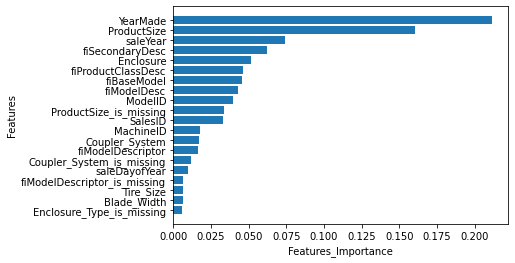

In [109]:
plot_feature(x_train.columns,ideal_model.feature_importances_)

# CatBoost.ai, XGBoost.ai is next try